In [8]:
import pandas as pd
import os
import glob as gb
import tensorflow as tf

In [9]:
TRAINING_DIR = "Train"
TEST_DIR = "Test"
BATCH_SIZE=64

In [10]:
for folder in os.listdir(TRAINING_DIR):
    files = gb.glob(pathname= str(TRAINING_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 116 in folder Blotch_Apple
For training data, found 67 in folder Normal_Apple
For training data, found 114 in folder Rot_Apple
For training data, found 82 in folder Scab_Apple


In [11]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 30 in folder Blotch_Apple
For testing data, found 24 in folder Normal_Apple
For testing data, found 38 in folder Rot_Apple
For testing data, found 27 in folder Scab_Apple


In [12]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    
    target_folder = target_dir + target_class
    
  
    random_image = random.sample(os.listdir(target_folder),1)
    
   
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [13]:
class_names = ['Blotch_Apple','Normal_Apple','Rot_Apple','Scab_Apple']

Image shape (236, 214, 3)
Image shape (320, 379)
Image shape (612, 598, 3)
Image shape (267, 198, 3)
Image shape (269, 191, 3)
Image shape (100, 100, 3)
Image shape (183, 275, 3)
Image shape (218, 231, 3)
Image shape (320, 344, 3)
Image shape (320, 300, 3)
Image shape (320, 450, 3)
Image shape (219, 230, 3)


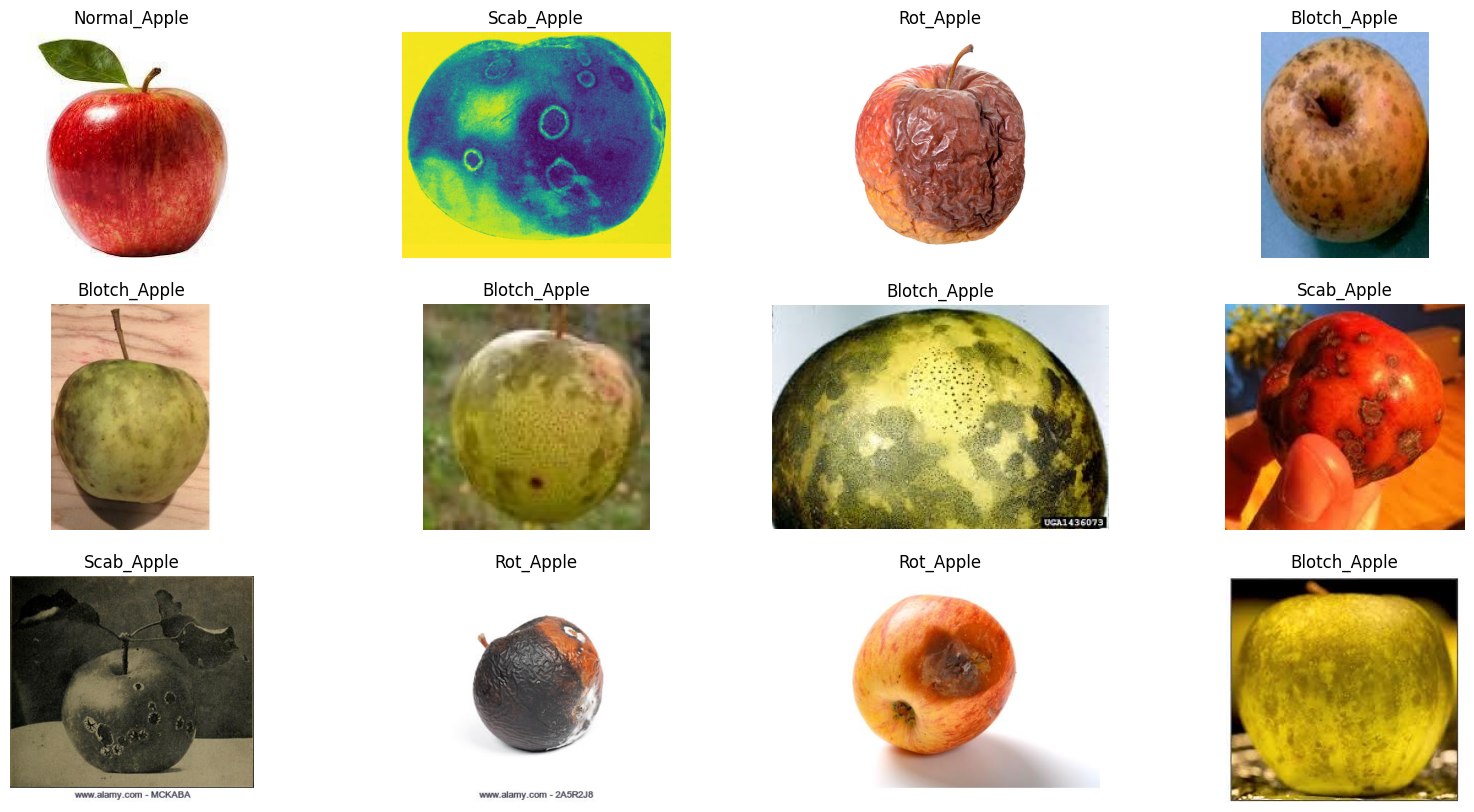

In [14]:
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="Train/", target_class=class_name)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
def train_val_generators(TRAINING_DIR, TEST_DIR):
 
  train_datagen = ImageDataGenerator(rescale= 1.0/255.0,
                                     rotation_range= 45,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     fill_mode= 'nearest')

  
  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size= 20,
                                                      class_mode= 'categorical',
                                                      target_size=(224, 224))

 
  validation_datagen = ImageDataGenerator( rescale = 1.0/255.0 )

  
  validation_generator = validation_datagen.flow_from_directory(directory= TEST_DIR,
                                                                batch_size= 20,
                                                                class_mode= 'categorical',
                                                                target_size=(224, 224))
  
  return train_generator, validation_generator

In [17]:
train_generator, test_generator = train_val_generators(TRAINING_DIR, TEST_DIR)

Found 382 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [19]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 64)       

In [114]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='weights.best.hdf5', monitor='val_loss', save_best_only=True)
history = model.fit(train_generator, validation_data=test_generator, epochs=150, steps_per_epoch=len(train_generator), validation_steps=len(test_generator), callbacks=[checkpoint])

Epoch 1/150
20/20 [==============================] - ETA: 0s - loss: 0.8677 - accuracy: 0.6387

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 117s 6s/step - loss: 0.8677 - accuracy: 0.6387 - val_loss: 0.9618 - val_accuracy: 0.6417
Epoch 2/150
20/20 [==============================] - 117s 6s/step - loss: 0.8621 - accuracy: 0.6361 - val_loss: 0.9730 - val_accuracy: 0.5750
Epoch 3/150
20/20 [==============================] - 118s 6s/step - loss: 0.8606 - accuracy: 0.6754 - val_loss: 2.2754 - val_accuracy: 0.4500
Epoch 4/150
20/20 [==============================] - 158s 8s/step - loss: 0.8488 - accuracy: 0.6754 - val_loss: 0.9160 - val_accuracy: 0.6000
Epoch 5/150
20/20 [==============================] - 133s 7s/step - loss: 0.8179 - accuracy: 0.6597 - val_loss: 1.0874 - val_accuracy: 0.5333
Epoch 6/150
20/20 [==============================] - 125s 7s/step - loss: 0.8327 - accuracy: 0.6675 - val_loss: 0.9583 - val_accuracy: 0.6167
Epoch 7/150
20/20 [==============================] - 139s 7s/step - loss: 0.7355 - accuracy: 0.6832 - val_loss: 1.1362 - val_accuracy: 0.6083
Epoch 8/150
20/20 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined

In [115]:
import tensorflow as tf

model = tf.keras.models.load_model('weights.best.hdf5')

In [119]:
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image

img_path = 'AnyConv.com__images (6).jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension
img = img / 255.0  # Normalize pixel values
prediction = model.predict(img)

print(prediction)


# Assuming binary classification, if prediction is close to 1, it's diseased; if close to 0, it's healthy.
# if prediction > 0.5:
#     print("The apple fruit appears to be diseased.")
# else:
#     print("The apple fruit appears to be healthy.")

1/1 [==============================] - 0s 134ms/step
[[0.00182809 0.23012441 0.7585994  0.00944809]]
